In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg=(x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    def fit(self,X,y=None):
        #在数据区间创建N个高斯分布中心
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_=self.width_factor*(self.centers_[1]-self.centers_)
        return self
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


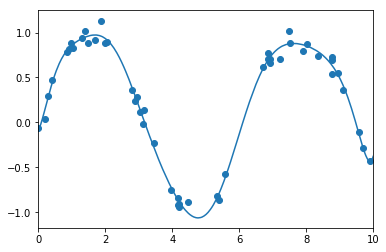

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# 生成随机数
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)
xfit = np.linspace(0, 10, 1000)
gauss_model=make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit=gauss_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)
plt.show()